In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


In [3]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

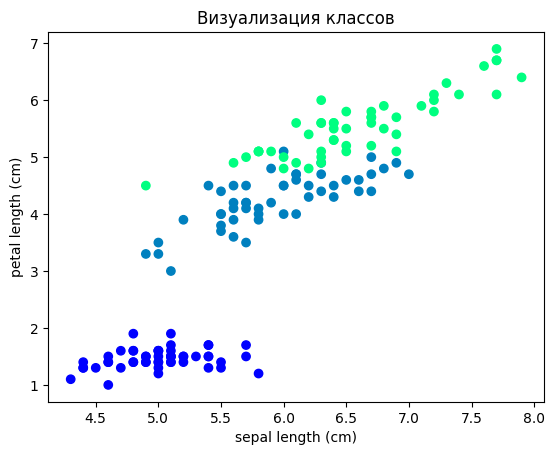

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='winter')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

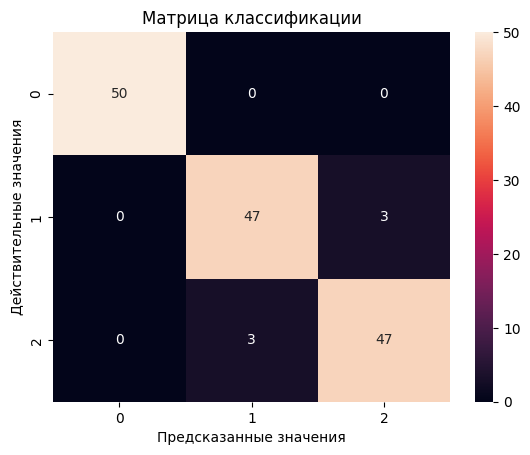

In [12]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


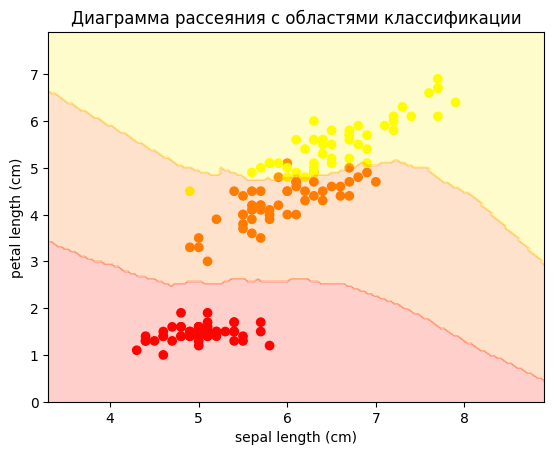

In [16]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

# 1. Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


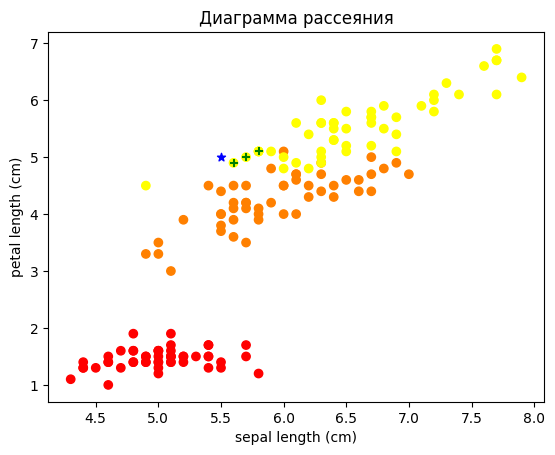

In [17]:
iris = load_iris()
features = iris.data

X = data.iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


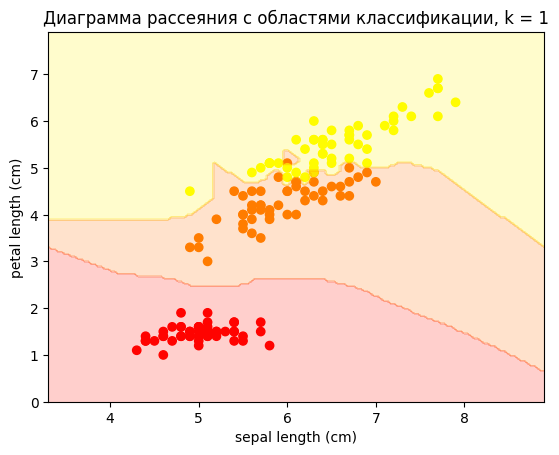

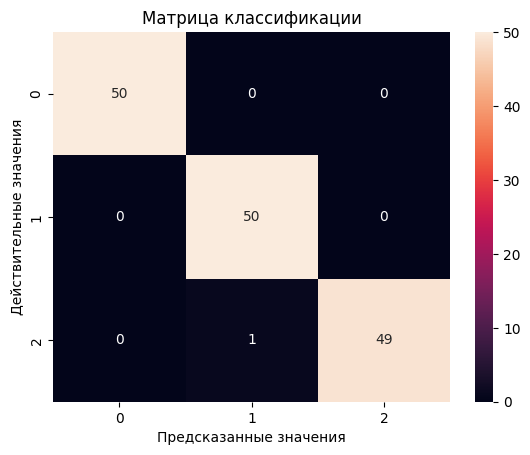

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


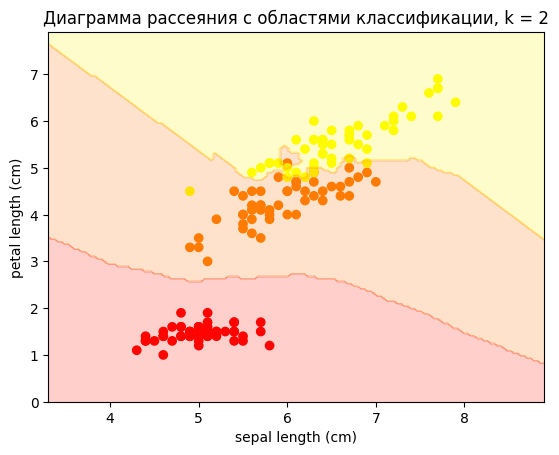

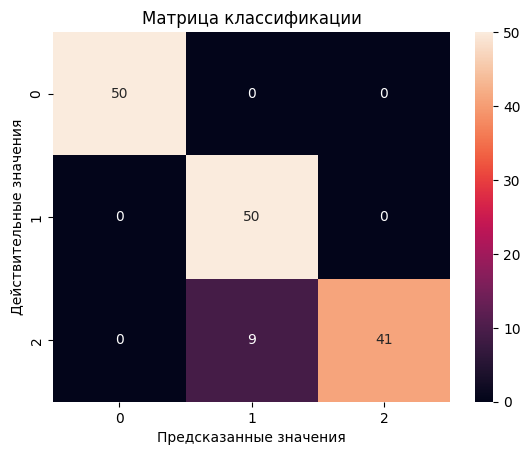

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


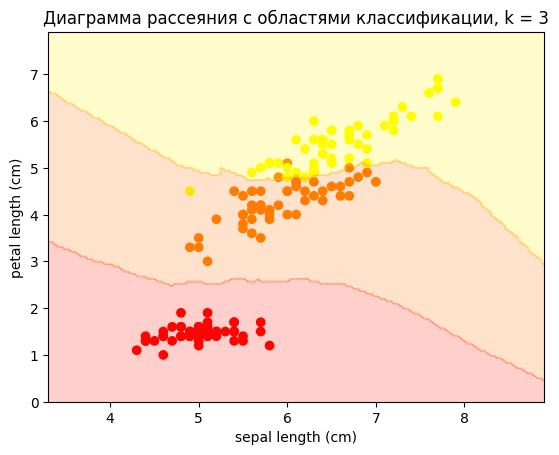

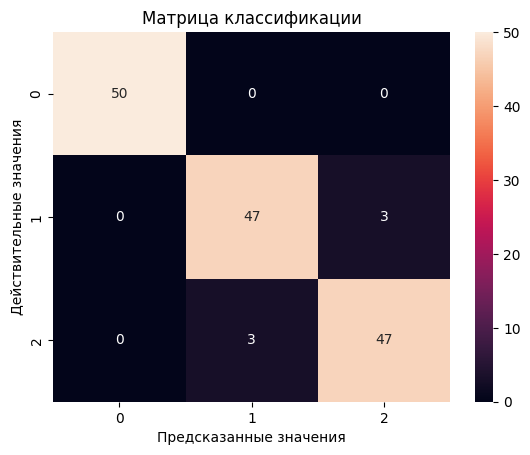

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


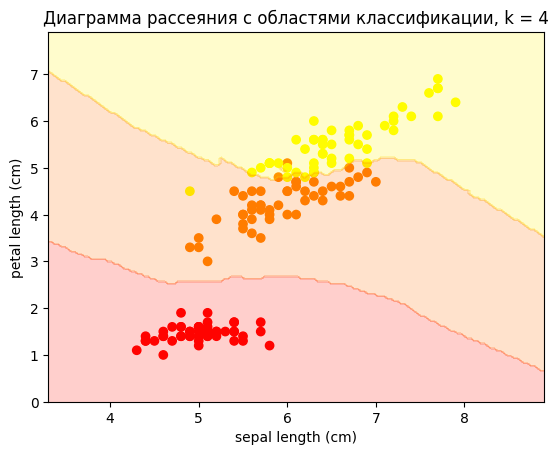

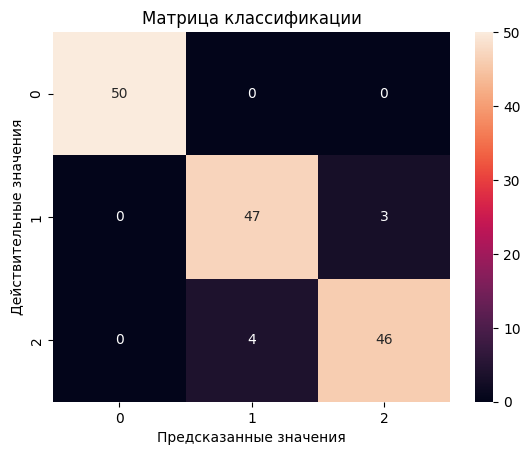

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


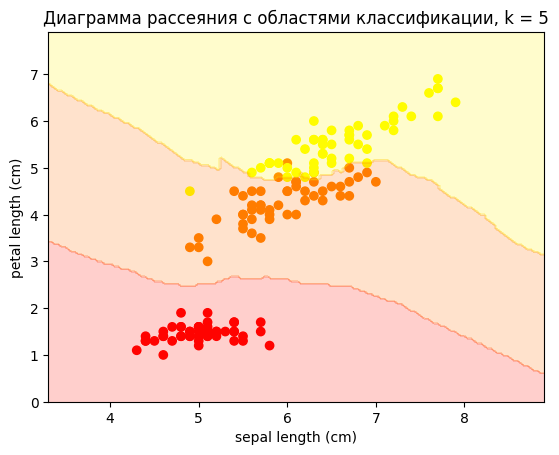

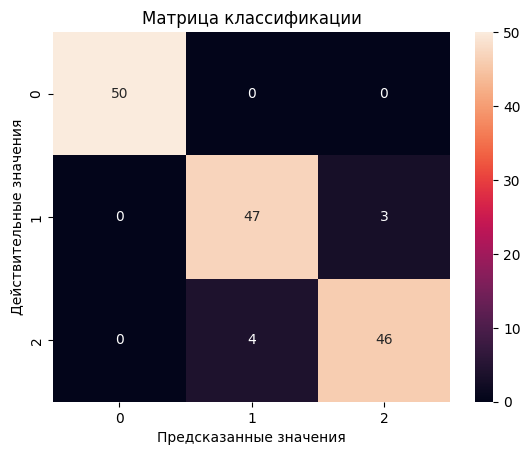

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


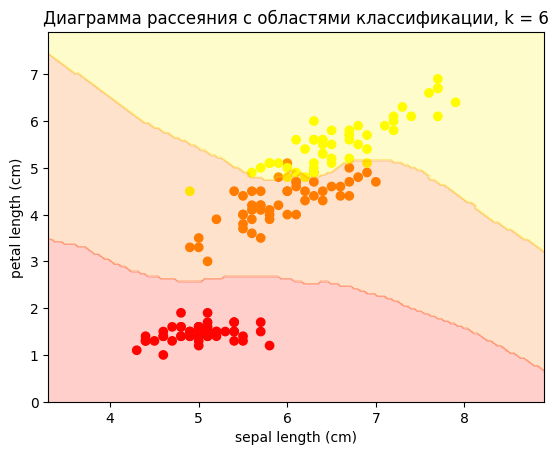

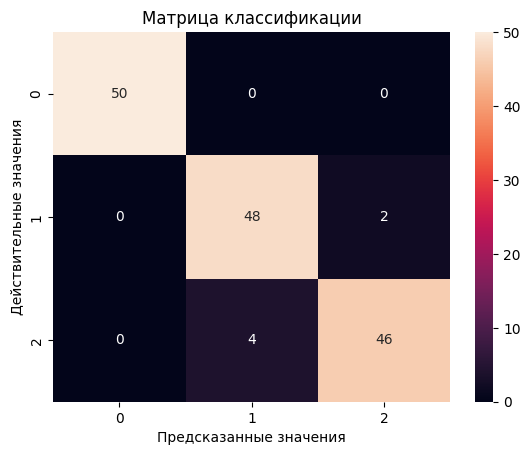

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


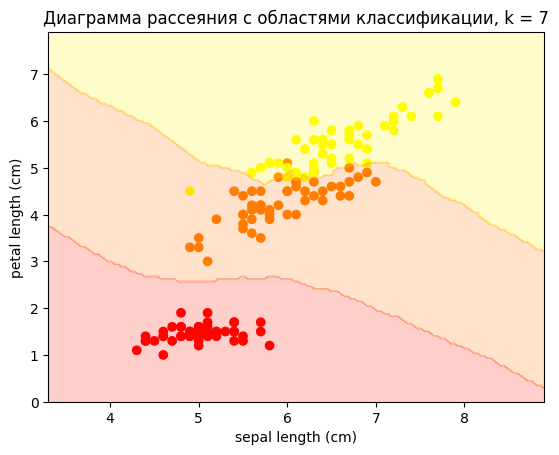

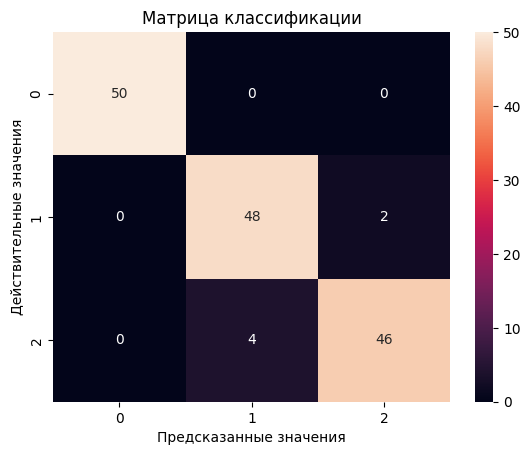

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


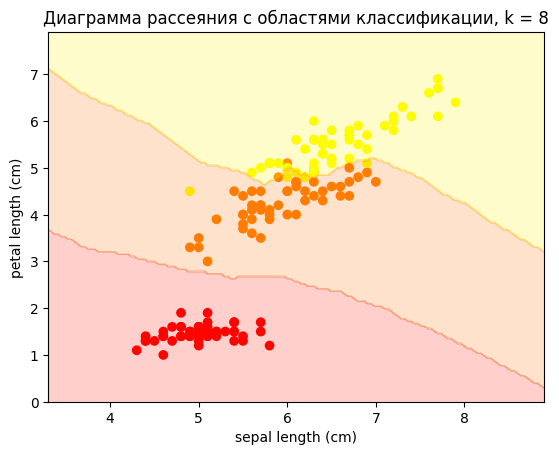

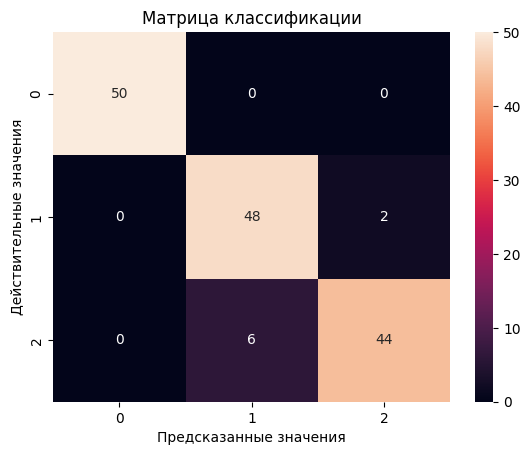

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


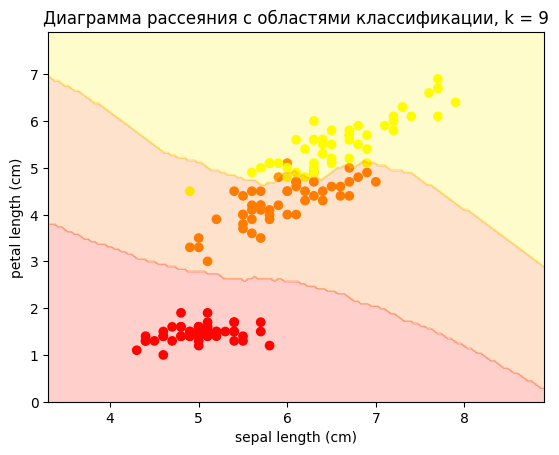

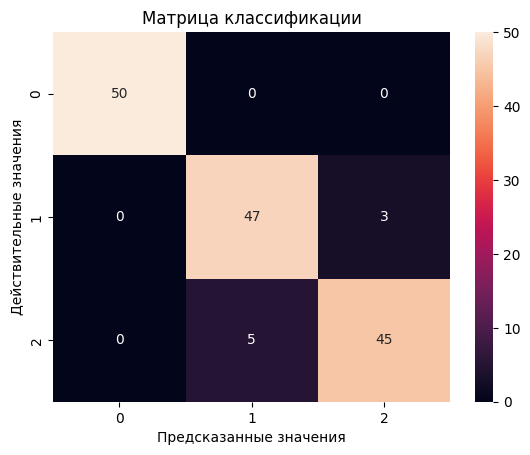

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


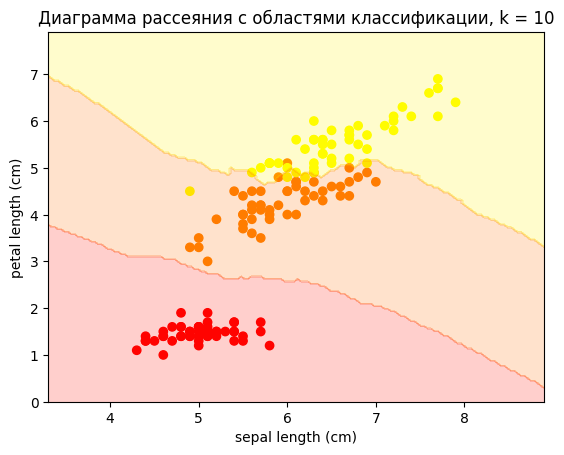

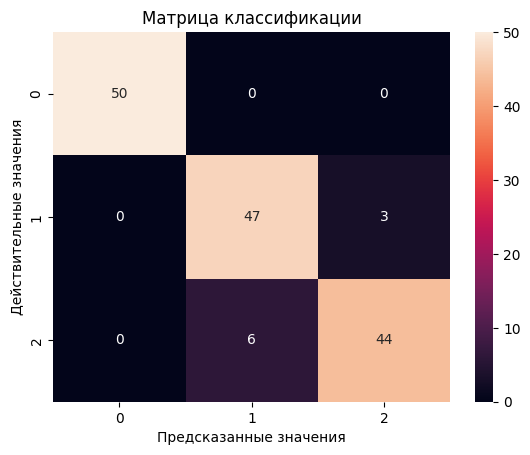

In [23]:
for j in range(1, 11):

    knn1 = KNeighborsClassifier(n_neighbors=j)
    knn1.fit(X_scaled, y)

    y_pred = knn1.predict(X_scaled)

    X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)

    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

    XX_scaled = scaler.transform(XX)
    Z = knn1.predict(XX_scaled).reshape(X0_grid.shape)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(f"Диаграмма рассеяния с областями классификации, k = {j}")
    plt.show()

    plt.title("Матрица классификации")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


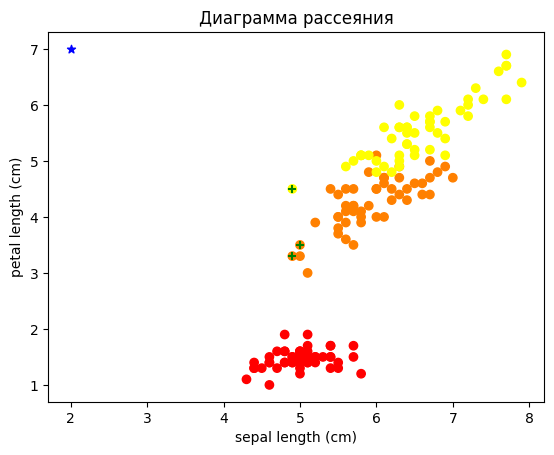

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

observation_new = [[2, 7]]
observation_new_scaled = scaler.transform(observation_new)

distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

reverse = scaler.inverse_transform(X_scaled[indices[0]])
for i in range(3):
    plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')


plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


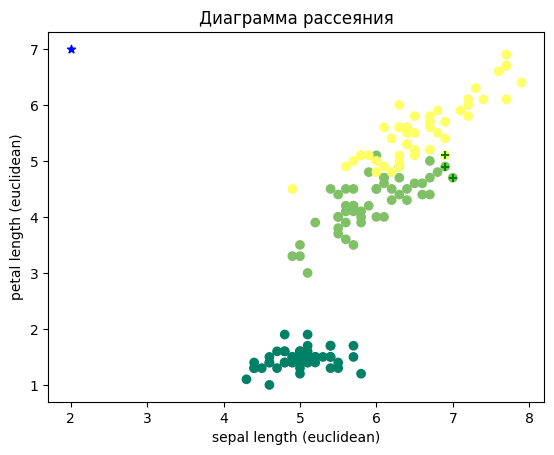

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


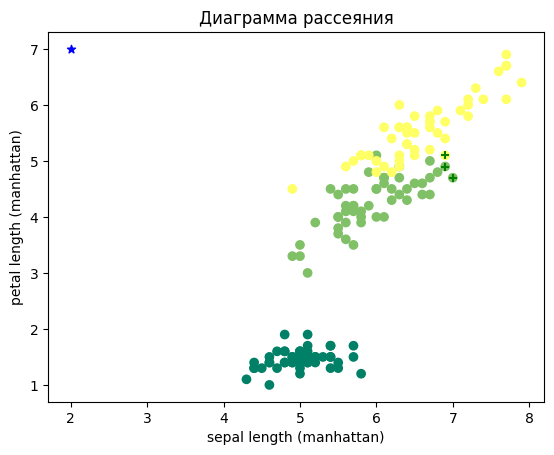

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


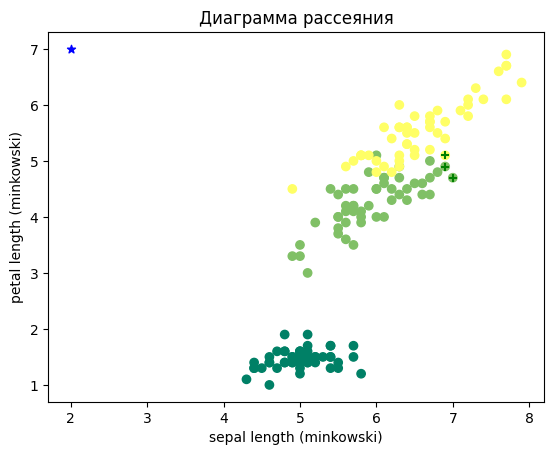

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


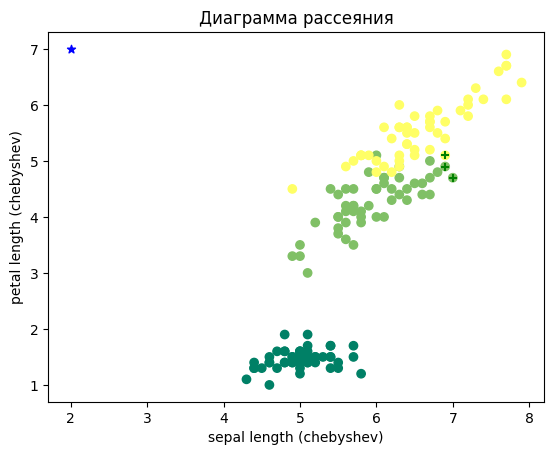

In [38]:
for j in range(4):
    caler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
    models = [KNeighborsClassifier(n_neighbors=3, metric=metric) for metric in metrics]

    point = [[7, 5]]

    observation_new_scaled = scaler.transform(point)
    y_pred = knn.predict(X_scaled)

    distances, indices = knn.kneighbors(observation_new_scaled)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='summer')

    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

    reverse = scaler.inverse_transform(X_scaled[indices[0]])

    for i in range(3):
        plt.scatter(reverse[i][0], reverse[i][1],  marker='+', color='g')
    plt.title("Диаграмма рассеяния")
    plt.xlabel(f'sepal length ({metrics[j]})')
    plt.ylabel(f'petal length ({metrics[j]})')
    plt.show()



# 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [39]:
from sklearn.metrics import classification_report
iris = load_iris()
features = iris.data
X = data
y = iris.target

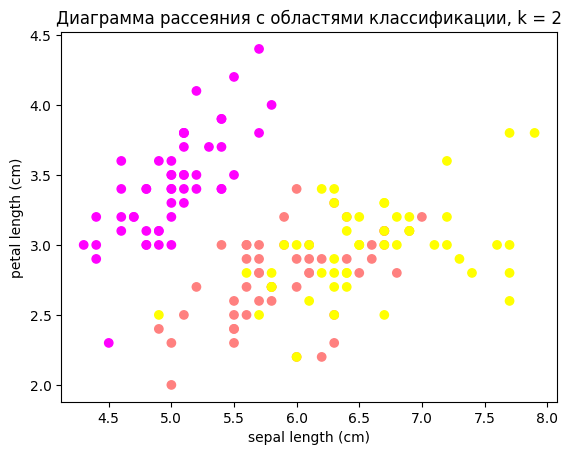

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.93      0.96        54
           2       0.92      1.00      0.96        46

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150



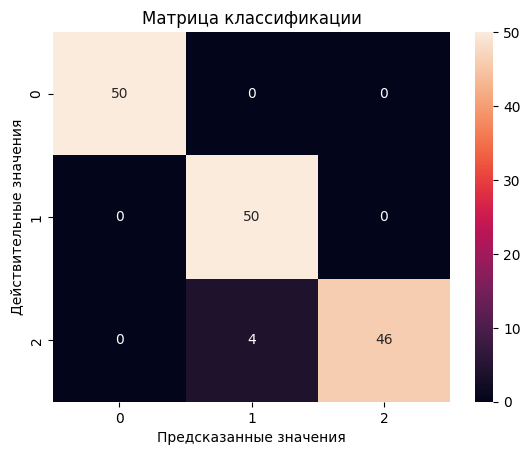

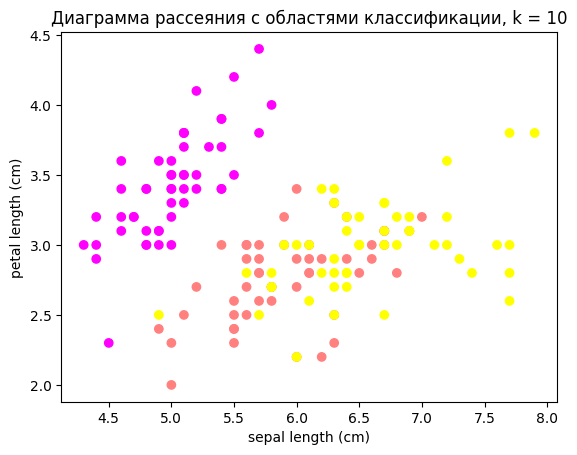

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.92      0.95        53
           2       0.92      0.98      0.95        47

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



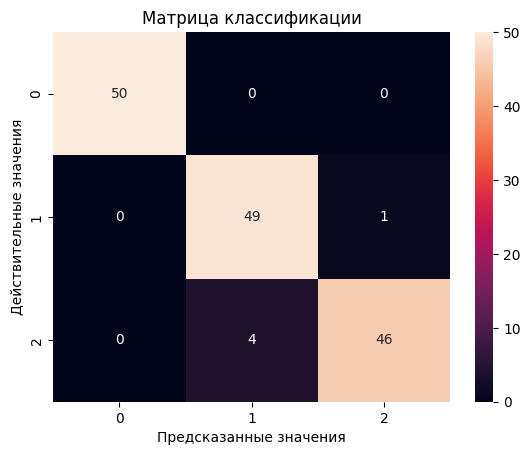

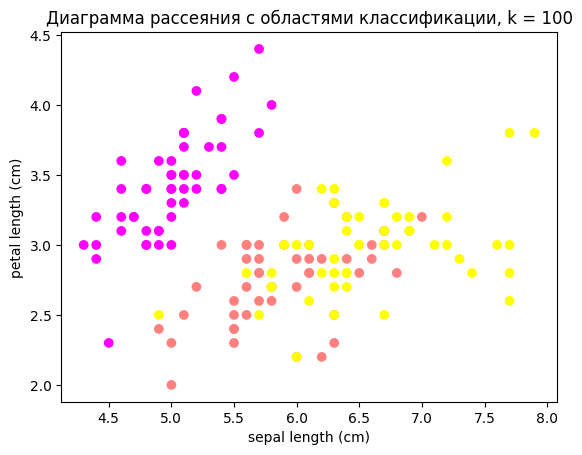

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.51      0.68        98
           2       0.04      1.00      0.08         2

    accuracy                           0.68       150
   macro avg       0.68      0.84      0.58       150
weighted avg       0.99      0.68      0.78       150



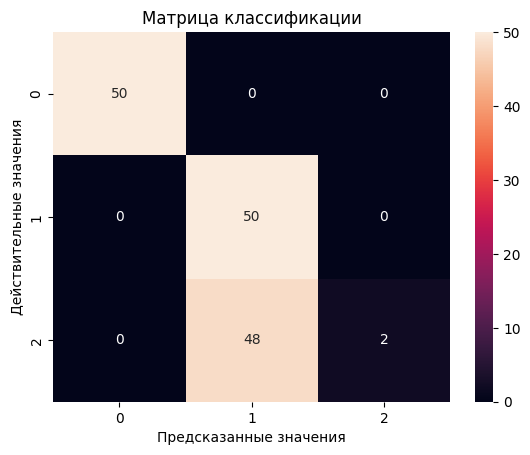

In [52]:
i = [2, 10, 100]

for j in i:

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    knn1 = KNeighborsClassifier(n_neighbors=j)
    knn1.fit(X_scaled, y)

    y_pred = knn1.predict(X_scaled)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='spring')

    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(f"Диаграмма рассеяния с областями классификации, k = {j}")
    plt.show()

    print(classification_report(y_pred, y))

    plt.title("Матрица классификации")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

# 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

Text(0, 0.5, 'accuracy')

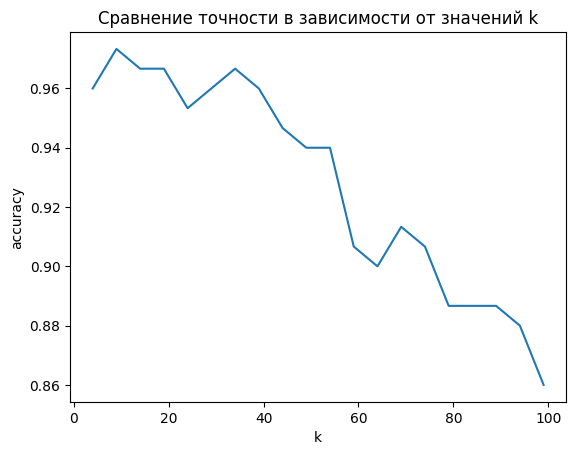

In [54]:
from sklearn.metrics import accuracy_score

def test_accuracy(x, y, k):
  scaler = MinMaxScaler()
  X_scaled = scaler.fit_transform(X)

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_scaled, y)

  y_pred = knn.predict(X_scaled)
  return accuracy_score(y, y_pred)

iris = load_iris()
features = iris.data
x = data
y = iris.target

accur = list(map(lambda k: test_accuracy(x, y, k), np.arange(4, 100, 5)))
plt.plot(np.arange(4, 100, 5), accur)

plt.title("Сравнение точности в зависимости от значений k")
plt.xlabel('k')
plt.ylabel('accuracy')

# 8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


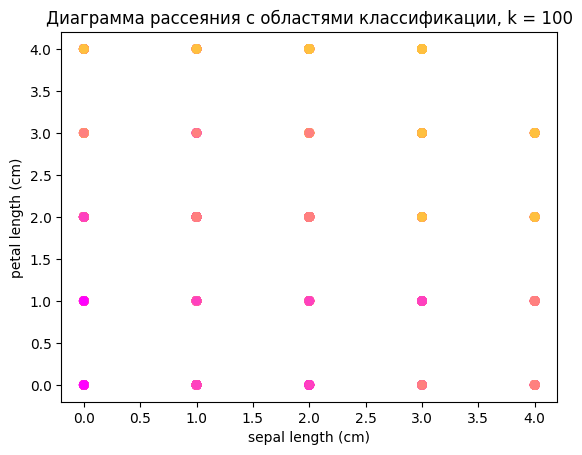

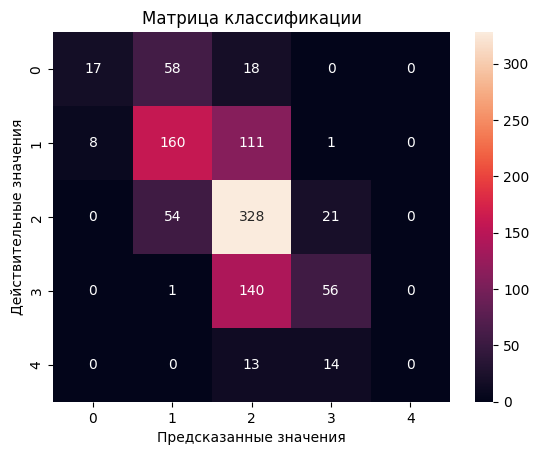

In [60]:
from sklearn.datasets import fetch_openml

lev = fetch_openml(data_id = 1029)

X = lev.data
y = lev.target

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

knn1 = KNeighborsClassifier(n_neighbors=100)
knn1.fit(X_scaled, y)

y_pred = knn1.predict(X_scaled)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='spring')

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации, k = 100")
plt.show()

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()